This notebook is for result analysis and filtration. (We need tools/methods for manipulating many optimization attempts.)

# Get only the Pareto optimal solutions

In [1]:
import os
import numpy as np
from copy import copy

import pickle

In [2]:
pareto_optimal_indices = []
pareto_optimal_objectives = []
pareto_optimal_opt_state = []

file_names = os.listdir("results/")
prefix = "opt_state"
suffix = ".pkl"

for file_name in file_names:
    # if file name is not of the right format, skip over it
    if not (file_name[:len(prefix)] == prefix and file_name[-len(suffix):] == suffix):
        continue
    
    result_idx = int(file_name[len(prefix):-len(suffix)])
    
    
    with open(f'results/{prefix}{result_idx}{suffix}', 'rb') as f:
        results = pickle.load(f)
    
    objectives = np.array([float(x) for x in results["objective_values"]])

    deletion_indices = []
    for opt_idx, opt_obj in enumerate(pareto_optimal_objectives):
        if all(objectives < opt_obj):
            deletion_indices.append(opt_idx)
        elif all(opt_obj < objectives):
            continue
    
    deletion_indices.sort()
    deletion_indices.reverse()

    for idx in deletion_indices:
        del pareto_optimal_indices[idx]
        del pareto_optimal_objectives[idx] 
        del pareto_optimal_opt_state[idx] 
    
    pareto_optimal_indices.append(result_idx)
    pareto_optimal_objectives.append(objectives)
    pareto_optimal_opt_state.append(results)

In [3]:
[opt_state["objective_values"] for opt_state in pareto_optimal_opt_state]

[Array([9.7838718e-05, 5.9899247e-01, 6.4961374e-02, 1.3428126e-04,
        4.3309268e-05, 2.0677755e-03, 6.0032710e-04, 1.0446629e-03],      dtype=float32),
 Array([9.0205096e-05, 6.0967332e-01, 6.5088816e-02, 3.0985462e-05,
        8.2868710e-06, 1.5556578e-03, 3.7330808e-04, 1.1899028e-03],      dtype=float32),
 Array([8.9467052e-05, 6.0979396e-01, 6.5085456e-02, 4.4400884e-05,
        8.4663216e-06, 1.5518289e-03, 3.6753254e-04, 4.6111023e-04],      dtype=float32),
 Array([1.2033390e-04, 6.0972857e-01, 6.5088786e-02, 9.9965291e-05,
        7.9972444e-05, 1.5190199e-03, 3.5237629e-04, 6.4865820e-04],      dtype=float32),
 Array([8.4217907e-05, 5.9917462e-01, 6.5012582e-02, 1.1153076e-04,
        6.5685985e-05, 2.0615540e-03, 5.9891003e-04, 1.0354934e-03],      dtype=float32),
 Array([9.1701178e-05, 5.9592474e-01, 6.4948730e-02, 9.3916184e-05,
        6.1734405e-05, 2.2052056e-03, 6.8277790e-04, 1.6380186e-03],      dtype=float32),
 Array([9.6415693e-05, 6.0184455e-01, 6.4979888e-02,

In [4]:
[opt_state["opt_result"].message for opt_state in pareto_optimal_opt_state]

['Maximum number of iterations has been exceeded.',
 'Maximum number of iterations has been exceeded.',
 'Maximum number of iterations has been exceeded.',
 'Maximum number of iterations has been exceeded.',
 'Maximum number of iterations has been exceeded.',
 'Maximum number of iterations has been exceeded.',
 'Maximum number of iterations has been exceeded.',
 'Maximum number of iterations has been exceeded.',
 'Maximum number of iterations has been exceeded.',
 'Maximum number of iterations has been exceeded.',
 'Maximum number of iterations has been exceeded.',
 'Maximum number of iterations has been exceeded.',
 'Maximum number of iterations has been exceeded.',
 'Maximum number of iterations has been exceeded.',
 'Maximum number of iterations has been exceeded.',
 'Maximum number of iterations has been exceeded.',
 'Maximum number of iterations has been exceeded.',
 'Maximum number of iterations has been exceeded.',
 'Maximum number of iterations has been exceeded.',
 'Maximum nu

# Trim based on message

In [5]:
# drop solutions not limited purely by max iterations
for idx, result in enumerate(pareto_optimal_opt_state):
    if result["opt_result"].message != 'Maximum number of iterations has been exceeded.':
        del pareto_optimal_indices[idx]
        del pareto_optimal_objectives[idx] 
        del pareto_optimal_opt_state[idx] 

# Rank based on some criteria

In [19]:
idx = 1
pareto_optimal_opt_state.sort(key=lambda x: x["objective_values"][idx])
[x["objective_values"] for x in pareto_optimal_opt_state]

[Array([0.00067945, 0.16192393, 0.19520667, 0.00020053, 0.00044607,
        0.04183278, 0.00276439, 0.00712849], dtype=float32),
 Array([6.2259694e-04, 1.6313526e-01, 1.9517383e-01, 1.8673643e-04,
        2.5027457e-05, 4.1085713e-02, 2.9659239e-03, 1.1530024e-02],      dtype=float32),
 Array([1.2852640e-04, 5.8478099e-01, 6.4781182e-02, 1.0829020e-03,
        2.4939509e-04, 2.9203214e-03, 1.1949855e-03, 5.2871364e-03],      dtype=float32),
 Array([1.3047177e-04, 5.8552319e-01, 6.4755291e-02, 8.0386165e-04,
        1.7436009e-04, 2.8588767e-03, 1.1577189e-03, 6.7211720e-03],      dtype=float32),
 Array([1.2444702e-04, 5.8559626e-01, 6.4776935e-02, 7.3229260e-04,
        2.2557539e-04, 2.8402449e-03, 1.1187682e-03, 6.5364502e-03],      dtype=float32),
 Array([1.5161627e-04, 5.8566260e-01, 6.4753294e-02, 4.9950689e-04,
        1.5823489e-04, 2.8240618e-03, 1.1189262e-03, 7.9071401e-03],      dtype=float32),
 Array([1.1448593e-04, 5.8579320e-01, 6.4805351e-02, 5.2562862e-04,
        2.138

In [27]:
for i,state in enumerate(pareto_optimal_opt_state):
    if state["objective_values"][0] < 9e-5:
        if state["objective_values"][3] < 5e-5:
             if state["objective_values"][4] < 5e-5:
                if state["objective_values"][5] < 5e-3:
                    if state["objective_values"][7] < 9e-4:
                        print (i,pareto_optimal_indices[i],state["objective_values"])
# pareto_optimal_opt_state.sort(key=lambda x: x["objective_values"][0])

135 30 [8.9467052e-05 6.0979396e-01 6.5085456e-02 4.4400884e-05 8.4663216e-06
 1.5518289e-03 3.6753254e-04 4.6111023e-04]


In [8]:
pareto_optimal_opt_state[23]

{'params': array([-1468.74958622,  -571.939742  , -2001.19154559,  1877.23646589,
          472.81422785,  7414.44040328, 12763.86622565, -3775.10265018,
         4334.2539101 , -3546.45923267, -6396.74647716, -2782.39070148,
        -8842.50962317,   -57.69388335,   725.02037041,  3445.41720818,
        -2995.07669203, -1290.12970453, -5001.65858259, -4694.26909019,
         3012.6531082 ,  1847.96127955, -2855.2115526 ,  1503.52750762,
          789.19155689, -3469.44428347,  2644.24308208,  3570.88723755,
         1957.79668767, -1356.38893177,  3306.3103528 ,  3359.48090338,
         3161.53688364,  -564.01007847,  1842.78120335,  3233.02043986,
         1489.43967595,  -328.5668552 , -1959.25959889,   740.61552173,
         -792.70426486,  -846.66867887, -3564.54986313, -1998.21420315,
        -1447.28145988, -2176.12145422, -1582.25397516, -2165.44479192,
        -1557.75416452,   588.20968938, -2265.30503967, -1560.97439181,
           85.28977459, -6937.31478772, 13068.77637528

# Move solutions to keep to be new initial guesses

In [9]:
num_to_keep = len(pareto_optimal_opt_state)

In [10]:
# clear initial guesses folder
file_names = os.listdir("initial_guesses/")

for file_name in file_names:
    os.remove(f"initial_guesses/{file_name}")

In [11]:
for idx, opt_state in enumerate(pareto_optimal_opt_state[:150]):
    with open(f'initial_guesses/{prefix}{idx}{suffix}', 'wb') as f:
        pickle.dump(opt_state, f)

# Clear results and log folder

In [12]:
file_names = os.listdir("results/")

for file_name in file_names:
    os.remove(f"results/{file_name}")
    
file_names = os.listdir("logs/")

for file_name in file_names:
    os.remove(f"logs/{file_name}")

# plotting 

In [15]:
pareto_optimal_indices[-1]

24

In [16]:
import pickle

result_idx = 299
with open(f'results/results{result_idx}.pkl', 'rb') as f:
    results = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'results/results299.pkl'

In [20]:
import jax.numpy as jnp
from numpy.polynomial.chebyshev import Chebyshev

num_params=65    ##Parameter space dimension
max_deg=int((num_params)/2 -1)    ##max degree of chebyshev basis
dt = 1/4.5

#T=5.27*0.25/r       ##Domain of basis function
n = 130         ##number of samples, affects the Total duration of the pulse
T = dt * n



v=5.0883

def discretized_chebyshev(degree, n, T):
    dt = T / n
    coeffs = jnp.zeros(degree + 1)
    coeffs = coeffs.at[-1].set(1.)

    return jnp.array(Chebyshev(coeffs, domain=[0, T], window=[-1,+1])(jnp.linspace(0, T-dt, n) + dt/2 ))

def discretized_chebyshev_basis(max_degree, n, T):
    vals = list(range(max_degree + 1))
    disc_leg_map = map(lambda deg: discretized_chebyshev(deg, n, T), vals)
    
    return jnp.array(list(disc_leg_map))

import jax.numpy as jnp



basis=jnp.concatenate((jnp.zeros((int(num_params/2),1)),discretized_chebyshev_basis(int(num_params/2)-1, n-1, T)),1) 
##creating Chebyshev basis and adding zero pad in the begining

#T_gate=np.ceil(3*T-2*T/n)   ##Convolution adds some samples. Final T_gate is equal to this.

from qiskit_dynamics.signals import Convolution
def gaus_left(t):
    sigma = 8
    delt = 0.015
    return 2.*delt/np.sqrt(2.*np.pi*sigma**2)*np.exp(-t**2/(2*sigma**2))
def gaus_right(t):
    sigma = 8
    delt = 0.015
    return 2.*delt/np.sqrt(2.*np.pi*sigma**2)*np.exp(-(t-T)**2/(2*sigma**2))

convolution_left =jnp.array([gaus_left(x) for x in (np.linspace(0, T, n) +T/(2*n))])
convolution_right=jnp.array([gaus_right(x) for x in (np.linspace(0, T, n) +T/(2*n))])

from qiskit_dynamics import DiscreteSignal
from jax.scipy.signal import convolve
def construct_smooth_sig(params):
    sig=jnp.sum(jnp.multiply(basis, params[0:,None]),0)
    smooth_sig=convolve(convolve(sig,convolution_left),convolution_right)
    sig_bounded=jnp.arctan(smooth_sig) /(np.pi / 2)
    return sig_bounded

def get_parameterized_signal(params):
    phase = params[-1]
    params = params[:-1]
    real_sig=construct_smooth_sig(params[0:(max_deg+1)])
    comp_sig=construct_smooth_sig(params[max_deg+1:(2*(max_deg+1))])
    smooth_signal=DiscreteSignal(T/n, real_sig+(1j * comp_sig), carrier_freq=v, phase=phase)
    return smooth_signal

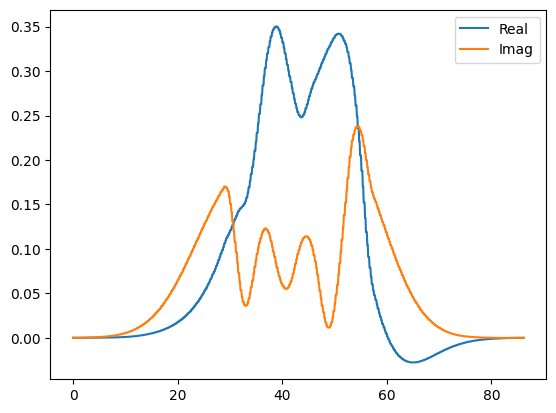

In [21]:
sig = get_parameterized_signal(results.x)

sig.draw(t0=0,tf=len(sig.samples) * dt,n=1000, function='envelope')

In [22]:
len(sig.samples) * dt

86.22222222222221

## results

In [ ]:
{'params': array([ 1.65055067e+02, -3.61324613e+01,  3.18159368e+02, -4.10590087e+01,
        -8.06388387e-01, -5.95933927e+01, -2.41014632e+02, -5.36191236e+00,
         4.66794769e+01,  7.84749594e+01,  9.78156943e+01, -9.99987190e+01,
        -1.17896455e+00, -8.88133309e+01, -2.70091793e+00,  1.19377088e+01,
        -5.20766717e+01, -7.33530214e+01, -6.13863336e+01, -3.04483206e+01,
        -7.77049293e+01, -4.86955387e+00,  5.57710752e+01, -5.50587141e+01,
        -1.01841305e+02,  1.30635663e+01,  6.63926953e+01,  1.22670225e+02,
         2.63765547e+01,  2.57688504e+01, -1.44476029e+01, -7.28726890e-01,
        -5.42700684e+01, -2.53046657e+01, -1.06336848e+02, -2.14470672e+01,
        -3.14395031e+01, -9.49545445e+01,  2.91979682e+01, -7.06382305e+00,
        -2.25493344e+01,  6.32621683e+01, -5.65647088e+01, -4.77180938e+01,
        -2.70912775e+01, -3.53327195e+01, -4.02322629e+01, -3.71292001e+01,
        -1.22905545e-01,  4.53664872e+01, -4.62443172e+01, -5.38434222e+01,
        -4.11935010e+01,  2.09198396e+01,  6.68544354e+01,  4.54644967e+01,
        -2.67422527e+01,  4.11654747e+01, -2.39405138e+01,  8.24722602e+01,
         2.75573943e+01,  8.06369011e+01, -2.74387755e+01, -5.63183810e+01,
        -7.82968810e+01]),
 'objective_values': Array([4.0380033e-05, 3.2790533e-05, 4.4517037e-02, 4.9446327e-05,
        2.7216150e-04, 2.0739259e-03, 9.7616750e-04, 4.2030981e-05],      dtype=float32),
 'config': {'dim': 4,
  'v': 5.0883,
  'anharm': -0.343,
  'r': 0.138,
  'v_spec': 5.028,
  'num_params': 64,
  'n_steps': 80,
  'max_iter': 600,
  'weights': [1.25, 1.0, 1.0, 1.0, 1.0, 5.0, 0.1, 1.0],
  'tol': '1e-12',
  'log_folder': 'logs',
  'initial_guesses_folder': 'initial_guesses',
  'result_folder': 'results',
  'conda_environment': 'devEnv310',
  'device_type': 'cpu',
  'num_guesses': 140,
  'description': 'pi half optimization',
  'objective_description': 'fidelity, static Z, amp robustness, CR drive, counter CR drive, cross talk, average leakage, final leakage'},
 'opt_result':   message: Desired error not necessarily achieved due to precision loss.
   success: False
    status: 2
       fun: 0.055431186058619235
         x: [ 1.651e+02 -3.613e+01 ... -5.632e+01 -7.830e+01]
       nit: 198
       jac: [-2.922e-06 -4.194e-08 ...  3.009e-07  1.379e-08]
  hess_inv: [[ 1.025e+04 -3.861e+03 ...  3.847e+04 -1.322e+02]
             [-3.861e+03  3.087e+03 ... -1.133e+04  4.490e+01]
             ...
             [ 3.847e+04 -1.133e+04 ...  1.615e+05 -5.554e+02]
             [-1.322e+02  4.490e+01 ... -5.554e+02  2.967e+00]]
      nfev: 245
      njev: 234}